In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [3]:
#Create a path to where your data is stored.
path = r'/Users/davidscheider/anaconda_projects/ClimateWins/02 Data/Prepared Data'

In [4]:
#Read in the European weather data.
climate = pd.read_pickle(os.path.join(path, 'weather_scaled.pkl'))
climate

,DATE,MONTH,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,-1.731975,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,-1.731824,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,-1.731673,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.731523,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,-1.731372,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1.731372,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,1.731523,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,1.731673,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,1.731824,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [5]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [6]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.927601,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-1.280450,-0.124331,-0.391072,-0.257321,-0.668215
1,19600102,1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.825294,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.539569,-0.650834,-0.415953,-0.335759,-0.548046
2,19600103,1,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.940389,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.876333,-0.650834,-0.615003,-0.210258,-0.067372
3,19600104,1,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-1.042696,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.775304,-0.943336,-0.764290,-0.069069,-0.998679
4,19600105,1,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.978754,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.926848,-0.621584,-0.503037,-0.037694,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.747959,0.628750,-0.005167,0.898267,1.042841,0.440753,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,-0.000746,0.826301,0.517090,1.295755,-0.007287
22946,20221028,10,0.856604,0.367720,-0.005167,0.945734,1.278467,0.466330,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,-0.000746,1.074927,0.641496,1.358505,-0.007287
22947,20221029,10,0.856604,0.083991,-0.005167,0.914089,1.101748,0.786039,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,-0.000746,1.221178,0.716139,1.405568,-0.007287
22948,20221030,10,0.680055,0.265577,-0.005167,0.692578,0.880848,0.376811,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,-0.000746,1.235803,0.019467,0.668249,-0.007287


In [8]:
#You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.

In [7]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

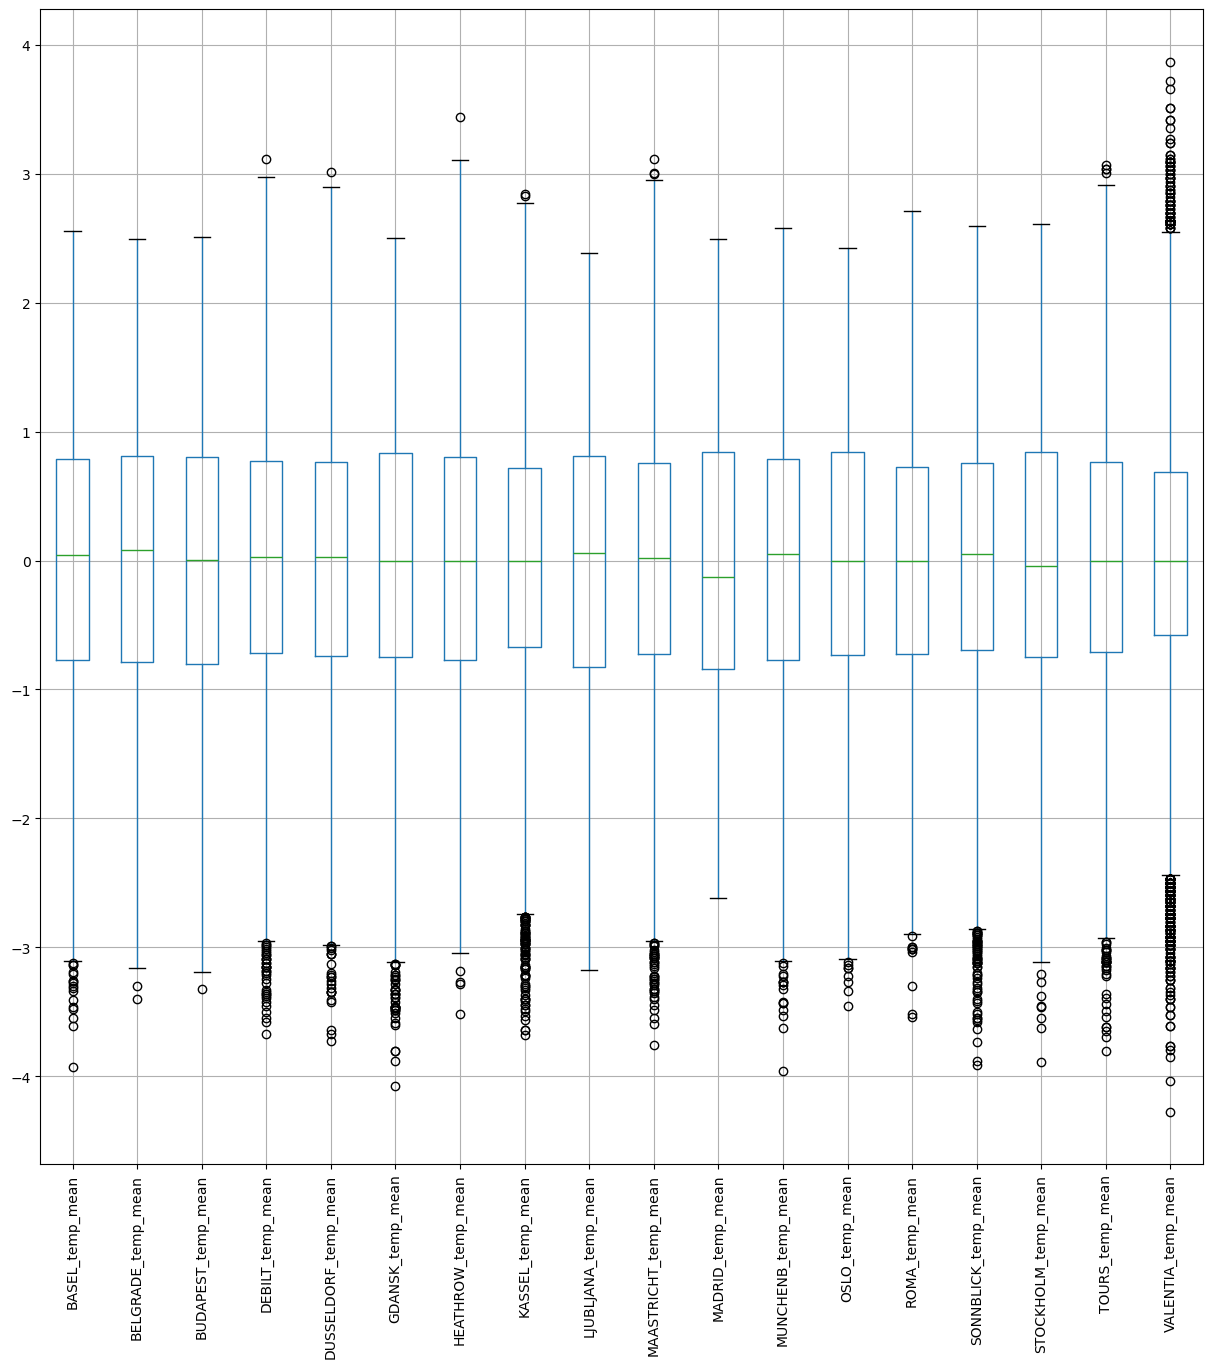

In [9]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

In [19]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1961')] #<-----INSERT YEAR HERE
dfyear

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
366,19610101,1,-1.261978,-1.119018,-1.146217,-1.174445,-1.107247,-1.017119,-1.294515,-1.083662,-1.310279,-1.087286,-1.163509,-1.208295,-0.817587,-1.145744,-1.016461,-0.838933,-1.355455,-0.758341
367,19610102,1,-0.813817,-0.778544,-1.216797,-0.889645,-0.901074,-0.978754,-1.224630,-0.862164,-1.237625,-0.802228,-1.379174,-1.082622,-0.805452,-0.657436,-1.031086,-0.789171,-0.790700,-1.239016
368,19610103,1,-0.745913,-0.290531,-0.922712,-0.715601,-0.753808,-0.889236,-1.608998,-0.758798,-1.068099,-0.697206,-1.015239,-0.956948,-0.671969,-1.027877,-0.957961,-0.726968,-0.978952,-1.479353
369,19610104,1,-0.840978,-0.199738,-0.863895,-0.984579,-0.974707,-0.684622,-1.294515,-0.965530,-0.995445,-0.967261,-1.298299,-0.982083,-0.708373,-1.078392,-1.060337,-0.664765,-1.010327,-1.028721
370,19610105,1,-1.180494,-0.585609,-0.663917,-0.905467,-1.107247,-0.876447,-1.504171,-0.906464,-1.128644,-1.042277,-1.365695,-1.057487,-0.817587,-1.044715,-1.352838,-0.826492,-1.292705,-1.479353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,19611227,12,-1.927431,-1.187113,-1.993182,-2.519335,-2.108658,-2.986526,-1.888539,-2.545549,-1.673549,-2.527578,-1.069155,-1.736125,-1.751971,-0.337510,-0.753210,-2.207397,-1.763333,-2.590914
727,19611228,12,-1.533592,-1.368700,-1.440302,-2.503513,-1.769945,-2.666817,-2.342792,-1.940121,-1.455587,-1.882447,-1.082634,-1.648153,-0.866127,-0.185966,-0.694709,-1.510724,-1.496644,-3.612347
728,19611229,12,-1.424946,-1.448144,-1.240324,-1.190268,-1.063067,-1.490288,-1.713826,-1.201794,-1.164971,-0.937255,-0.826531,-2.201118,-1.193768,-0.606922,-0.650834,-1.498284,-1.010327,-3.522221
729,19611230,12,-1.302720,-1.516239,-1.310904,-0.557378,-0.518182,-1.042696,-1.119803,-0.935997,-0.777483,-0.262118,-0.732178,-1.962338,-1.096689,-0.910009,-0.621584,-0.938458,-0.273009,-2.921377


In [20]:
dfyear.describe()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
count,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1.961067e+07,6.526027,0.019142,0.008683,0.015911,-0.026878,-0.002871,0.038568,-0.038499,0.088841,-0.023540,0.009704,0.022836,-0.009368,0.012237,0.036667,0.012104,0.030271,-0.182794,0.037406
std,3.454755e+02,3.452584,0.947265,0.948151,0.987079,0.951551,0.922951,0.926514,0.942468,1.013458,0.969821,0.928760,0.940540,0.989509,0.977199,1.050807,0.914687,0.890500,0.758835,0.972378
min,1.961010e+07,1.000000,-2.728689,-2.526313,-2.346084,-2.867424,-2.447370,-3.088833,-2.342792,-2.767047,-2.545397,-2.737621,-1.931817,-3.319614,-2.674220,-2.728536,-2.917724,-2.282040,-2.469277,-3.612347
25%,1.961040e+07,4.000000,-0.678010,-0.755846,-0.793315,-0.668134,-0.650721,-0.684622,-0.717963,-0.581600,-0.765374,-0.622191,-0.664782,-0.642763,-0.756913,-0.876333,-0.606959,-0.652324,-0.618136,-0.578088
50%,1.961070e+07,7.000000,0.136829,0.129388,0.206575,0.059689,0.056157,0.159409,-0.001641,0.215793,0.167019,0.082952,-0.112140,0.111279,0.226010,-0.017584,0.036546,0.118992,-0.006319,0.052797
75%,1.961100e+07,10.000000,0.734378,0.753591,0.806508,0.708400,0.674675,0.773250,0.767095,0.835987,0.724033,0.653068,0.993146,0.739648,0.832753,0.992708,0.606924,0.778342,0.087807,0.803851
max,1.961123e+07,12.000000,1.929476,2.092790,2.029902,2.401379,2.132612,1.885837,2.287095,2.283107,1.801735,2.258394,1.734496,1.858144,1.633653,2.120868,1.937808,1.761148,2.127199,2.456170


In [ ]:
#Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year.

In [21]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

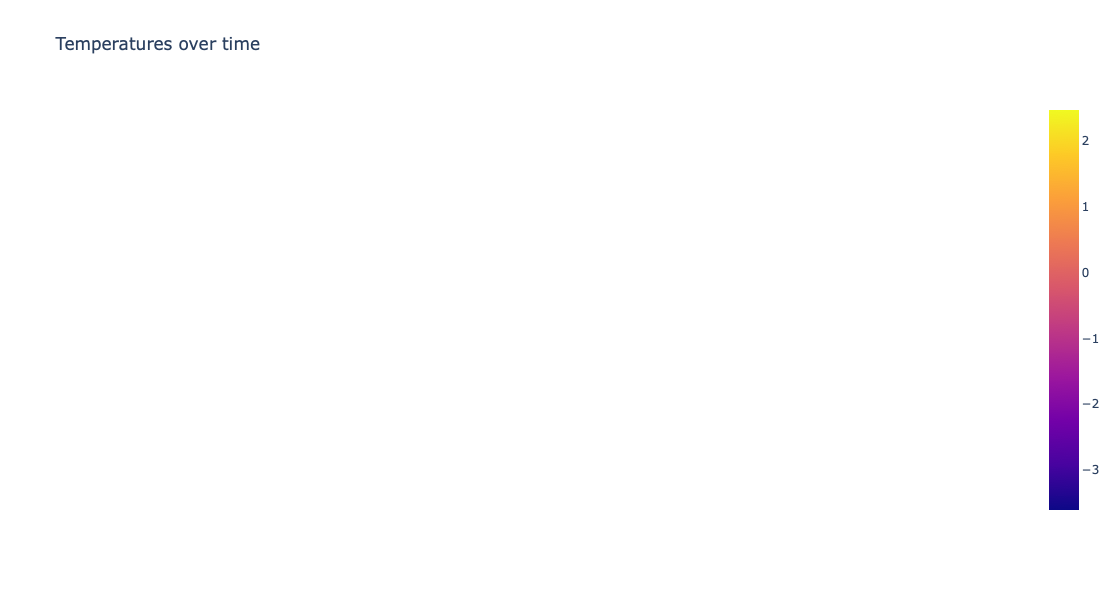

In [22]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [23]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
360,3.61
361,3.62
362,3.63
363,3.64


In [24]:
n_rows = dfyear.shape[0]
n_rows

365

In [25]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,2)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,2))
X = np.concatenate((ones, X), axis=1)
y=dfyear['STATION_temp_mean'].to_numpy().reshape(n_rows,2) #<----INSERT WEATHER STATION HERE

ValueError: cannot reshape array of size 365 into shape (365,2)

In [ ]:
X.shape, y.shape

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['STATION_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['STATION_temp_mean'].min()

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['STATION_temp_mean'].max()

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [ ]:
compute_cost(X,y)

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=10 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-10],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [ ]:
theta

In [ ]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [ ]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [ ]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [ ]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [ ]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

In [ ]:
#How well does gradient descent converge? How much do you need to adjust between different weather stations and years?